---
<div style="text-align: center;" >
    <h1>
        <b>データサイエンスプログラミング演習</b>
    </h1>
    <h3>
        第11,12回授業ノート
    </h3>
</div>
<div style="text-align: right">
    19220001<br/>
    中村亮太
</div>

---

<div style='padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;'>
    <h3>データサイエンティストの実際の姿</h3>
    戦略コンサルタント<br>
    組織の意思決定を行うリーダーの参謀<br>
</div>

---

# 実践データ分析　ケース1 比較的きれいなデータの扱い
### ECサイトの売上げデータ

よくある依頼事項
- 弊社の顧客データを使って、売上げを上げる施策を考えてほしい<br>

データ分析における問題点
- 現場の営業部員に話を聞いても「どこにデータがあるのか分からない」
- 店舗によって、また担当者によって、データのフォーマットもバラバラ
- 担当者に聞かないと、データのフォーマットの意味を理解できない
- データの管理部署が複数に分かれており、一元管理が全くなされていない

`情報がどこにあるのか、どんな情報があるのかを一つ一つヒアリングしていくことによって、はじめて必要な情報が手に入る。`

さらなる問題点
- 「データ分析を行う必要があるのか」と非協力的な社員も少なくない

`「データ分析による恩恵の理解」や「必要なデータの提出」など、ネゴシエーターとしての能力も試されている`

## 顧客から入手したデータ一覧
|No.|ファイル名|概要|主軸|
|:--:|:--:|:--|:--:|
|1|customer_master.csv|顧客データ。氏名、性別、年齢など| |
|2  |item_master.csv  |取り扱っている商品データ。商品名、価格など| |
|3-1|transaction_1.csv|購入履歴データ。いつ、どの顧客がいくら購入したか| |
|3-2|transaction_2.csv|3-1の続き。システムの都合上、分割されている    | |
|4-1|transaction_detail1.csv|購入履歴の詳細データ。具体的に、どの商品をいくつ購入したか|　〇　|
|4-2|transaction_detail2.csv|4-1の続き　　　                   |　〇　|

---

In [76]:
#データフレームの表示数を設定する
import pandas as pd
#すべての行を表示する
#pd.set_option('display.max_rows', None)

#8行分を表示する
pd.set_option('display.max_rows', 8)

---

## ステップ1　各データ No.1〜No.6の確認（ファイルの読み込み）

#### No.1 顧客データ（customer_master.csv)の確認

In [77]:
customer_master = pd.read_csv('customer_master.csv', encoding='UTF-8')
customer_master

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
...,...,...,...,...,...,...,...,...,...
4996,HD758694,中原 まひる,2019-07-31 19:09:26,なかはら まひる,nakahara_mahiru@example.com,F,27,1991/11/13,茨城県
4997,PL538517,田端 由宇,2019-07-31 19:30:05,たばた ゆう,tabata_yuu1@example.com,F,73,1945/12/28,愛知県
4998,OA955088,瀬戸内 光,2019-07-31 22:32:08,せとうち ひかる,setouchi_hikaru@example.com,F,75,1944/4/9,宮城県
4999,HI349563,堀井 寛治,2019-07-31 22:49:49,ほりい かんじ,horii_kanji@example.com,M,21,1998/2/6,広島県


#### 上記の結果より、顧客データ（customer_master.csv）は5000行x9列のデータ

#### No.2 商品データ（item__master.csv)の確認

In [78]:
item_master = pd.read_csv('item_master.csv', encoding='UTF-8')
item_master

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


#### 商品データ(item_master.csv）は5行x3列のデータ

#### No.3-1 購入履歴データ1（transaction_1.csv)の確認

In [6]:
transaction_1 = pd.read_csv('transaction_1.csv', encoding='UTF-8')
transaction_1

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
...,...,...,...,...
4996,T0000005109,150000,2019-06-15 03:36:16,HI215420
4997,T0000005110,50000,2019-06-15 03:44:06,IK880102
4998,T0000005111,210000,2019-06-15 04:14:06,IK074758
4999,T0000005112,50000,2019-06-15 04:42:38,HD444151


#### 購入履歴データ(transaction_1.csv）は5000行x4列のデータ

#### No.3-2 購入履歴データ2（transaction_2.csv)の確認

In [7]:
transaction_2 = pd.read_csv('transaction_2.csv', encoding='UTF-8')
transaction_2

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
...,...,...,...,...
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738
1785,T0000006898,85000,2019-07-31 23:41:38,AS834214


#### 購入履歴データ2(transaction_2.csv）は1786行x4列のデータ

#### No.4-1 購入履歴の詳細データ1（transaction_detail_1.csv)の確認

In [8]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv', encoding='UTF-8')
transaction_detail_1

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
...,...,...,...,...
4996,4996,T0000004866,S001,3
4997,4997,T0000004867,S001,3
4998,4998,T0000004868,S005,1
4999,4999,T0000004869,S003,1


#### 購入履歴の詳細データ1(transaction_detail_1.csv）は5000行x4列のデータ

#### No.4-2 購入履歴の詳細データ2（transaction_detail_2.csv)の確認

In [9]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv', encoding='UTF-8')
transaction_detail_2

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
...,...,...,...,...
2140,7140,T0000006895,S002,1
2141,7141,T0000006896,S001,2
2142,7142,T0000006897,S002,1
2143,7143,T0000006898,S002,1


#### 購入履歴の詳細データ2(transaction_detail_2.csv）は2144行x4列のデータ

>以上のように、まずはデータの全体像を把握することが重要<br>
- 主軸を決め、それに合わせて分析しやすいデータを作成する<br>
 - なるべくデータの粒度が細かいデータに合わせてデータを作成する<br>
 - ECサイトの売上げデータは重要な要素<br>
 - 売上げ関連の中で最も粒度の細かいデータは「購入明細の詳細データ＝transaction_detail_1とtransaction_detail_2」である<br>
 - これを主軸としてデータを作成する

---

## ステップ2 購入明細の詳細データ（transaction_detail1と2）を主軸にデータを加工する
- 2-1：2つに分かれた購入履歴データを1つに統合する
 - transaction_1とtransaction_2を縦に結合する　→　transaction
 - 縦の結合＝「ユニオン」・・・行を追加する
- 2−2：2つに分かれた購入履歴の詳細データを1つに統合する
 - transaction_detail_1とtransaction_detail_2を縦に結合する（ユニオン） → transaction_detail
- 2-3：transaction_detailを主軸として、transaction、item_master、customer_masterを横に結合する
 - 横の結合＝「ジョイン」・・・列を追加する 

**2-1：2つに分かれた購入履歴データを1つに統合する**

In [10]:
transaction = pd.concat([transaction_1,transaction_2])
transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
...,...,...,...,...
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738
1785,T0000006898,85000,2019-07-31 23:41:38,AS834214


In [15]:
#上記の例では、元のデータフレームの行番号のまま追加されたが、ignore_index=True とすることで、通し番号を割り当てられる。
#ignore_index=Falseまたはignore_indexの記述をしないと、もとの行番号のまま結合される
transaction = pd.concat([transaction_1,transaction_2],ignore_index=True)
transaction.loc[4999:5010] #つなぎ目を確認する

,transaction_id,price,payment_date,customer_id
4999,T0000005112,50000,2019-06-15 04:42:38,HD444151
5000,T0000005113,295000,2019-06-15 07:20:27,TS169261
5001,T0000005114,50000,2019-06-15 07:35:47,HI599892
5002,T0000005115,85000,2019-06-15 07:56:36,HI421757
...,...,...,...,...
5007,T0000005120,210000,2019-06-15 12:25:34,IK855920
5008,T0000005121,210000,2019-06-15 13:22:35,HD498491
5009,T0000005122,210000,2019-06-15 13:29:29,GD086589
5010,T0000005123,100000,2019-06-15 13:42:00,AS588076


In [16]:
#データ件数を出力し、正しく結合されたことを確認する
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


**2-2:2つに分かれた購入履歴の詳細データを結合する**

In [17]:
transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2],ignore_index=True)
transaction_detail

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
...,...,...,...,...
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1
7143,7143,T0000006898,S002,1


In [18]:
#データ件数を出力し、結合されたことを確認する
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


**2-3:transaction_detailを主軸として、transaction、item_master、customer_masterを横に結合する**
- 主軸となるデータの中でどの列をキーにして他のデータをジョインするかを考える
 - 各データの列を出力し比較する
 - 主軸データに足りないデータ列は？共通するデータ列は？
|data|col1|col2|col3|col4|col5|col6|col7|col8|col9|
|--|--|--|--|--|--|--|--|--|--|
|transaction_detal|detail_id|**transaction_id**|**item_id**|quantity|
|item_master|**item_id**|item_name|item_price|
|transaction|**transaction_id**|price|payment_date|**customer_id**|
|customer_master|**customer_id**|customer_name|registration_date|customer_name_kana|email|gender|age|birth|pref|

In [54]:
#transaction_detail、transaction、item_master、customer_masterの列を表示して確認する
#transaction_detail
#transaction
#item_master
#customer_master

In [19]:
#transaction_detailの「item_id」を主軸としてitem_masterを結合する
join_data1=pd.merge(transaction_detail,item_master,on="item_id",how="left")
join_data1

,detail_id,transaction_id,item_id,quantity,item_name,item_price
0,0,T0000000113,S005,1,PC-E,210000
1,1,T0000000114,S001,1,PC-A,50000
2,2,T0000000115,S003,1,PC-C,120000
3,3,T0000000116,S005,1,PC-E,210000
...,...,...,...,...,...,...
7140,7140,T0000006895,S002,1,PC-B,85000
7141,7141,T0000006896,S001,2,PC-A,50000
7142,7142,T0000006897,S002,1,PC-B,85000
7143,7143,T0000006898,S002,1,PC-B,85000


In [20]:
#結合後に件数を確認する
print(len(transaction_detail))
print(len(item_master))
print(len(join_data1))

7144
5
7144


In [21]:
#さきほど結合して作成したjoin_data1の「transaction_id」を主軸にtransactionを結合する
join_data2=pd.merge(join_data1,transaction,on="transaction_id",how="left")
join_data2

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price,payment_date,customer_id
0,0,T0000000113,S005,1,PC-E,210000,210000,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,PC-A,50000,50000,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,PC-C,120000,120000,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,PC-E,210000,210000,2019-02-01 02:47:23,IK452215
...,...,...,...,...,...,...,...,...,...
7140,7140,T0000006895,S002,1,PC-B,85000,85000,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,PC-A,50000,100000,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,PC-B,85000,85000,2019-07-31 23:39:35,TS624738
7143,7143,T0000006898,S002,1,PC-B,85000,85000,2019-07-31 23:41:38,AS834214


In [22]:
#結合後に件数を確認する
print(len(transaction))
print(len(join_data2))

6786
7144


### 件数が増えている（要注意）

In [23]:
#さきほど結合して作成したjoin_data2の「customer_id」を主軸にcustomer_masterを結合する
join_data3=pd.merge(join_data2,customer_master,on="customer_id",how="left")
join_data3

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,0,T0000000113,S005,1,PC-E,210000,210000,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
1,1,T0000000114,S001,1,PC-A,50000,50000,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府
2,2,T0000000115,S003,1,PC-C,120000,120000,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県
3,3,T0000000116,S005,1,PC-E,210000,210000,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140,7140,T0000006895,S002,1,PC-B,85000,85000,2019-07-31 21:52:48,AS339451,相原 みき,2019-02-11 19:34:02,あいはら みき,aihara_miki@example.com,F,74,1945/2/3,北海道
7141,7141,T0000006896,S001,2,PC-A,50000,100000,2019-07-31 23:35:25,OA027325,松田 早紀,2019-04-17 09:23:50,まつだ さき,matsuda_saki@example.com,F,40,1979/5/25,福島県
7142,7142,T0000006897,S002,1,PC-B,85000,85000,2019-07-31 23:39:35,TS624738,進藤 正敏,2019-02-20 18:15:56,しんどう まさとし,shinndou_masatoshi@example.com,M,56,1963/2/21,東京都
7143,7143,T0000006898,S002,1,PC-B,85000,85000,2019-07-31 23:41:38,AS834214,田原 結子,2019-04-07 03:20:19,たはら ゆうこ,tahara_yuuko@example.com,F,74,1944/12/18,愛知県


In [24]:
#結合後に件数を確認する
print(len(customer_master))
print(len(join_data3))

5000
7144


### 件数が増えている

<div style='padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;'>
データを結合する度に件数の確認を行うこと！！
</div>

---

## ステップ3 データ検算を行う
- データ加工前のtransactionデータにおけるpriceの合計値と、データ加工後のjoin_data3のpriceの合計値は同じ値になると思う、、、

In [32]:
print(join_data3["price"].sum())
print(transaction["price"].sum())
print((join_data3['item_price']*join_data3['quantity']).sum())#join_data3のitem_price x quantity
#join_data3.loc[100:200]

1074750000
971135000
971135000


### 計算が合わない！！！

In [28]:
#price列を削除する　drop
join_data_comp=join_data3.drop("price",axis=1)
join_data_comp.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,0,T0000000113,S005,1,PC-E,210000,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
1,1,T0000000114,S001,1,PC-A,50000,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府
2,2,T0000000115,S003,1,PC-C,120000,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県
3,3,T0000000116,S005,1,PC-E,210000,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県
4,4,T0000000117,S002,2,PC-B,85000,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県


In [33]:
#item_price x quantityの計算結果をpriceとして列を追加
join_data_comp["price"]=join_data_comp["item_price"]*join_data_comp["quantity"]
join_data_comp[ ["quantity","item_price","price"] ].loc[10:30]
#データの一部を表示し、ただしく計算されていることを確認

,quantity,item_price,price
10,1,50000,50000
11,1,120000,120000
12,1,180000,180000
13,2,85000,170000
...,...,...,...
27,3,50000,150000
28,1,210000,210000
29,2,50000,100000
30,1,85000,85000


---

## ステップ4　各種統計量を把握する
- データ分析を進めていく上で、まずは2つの数字を知る必要がある。
 - 4-1：欠損値の確認
 - 4−2：全体の数字感をつかむ
 - 4-3：時系列変化をみる
 - 4-4：グラフで可視化する

In [35]:
#すべての行を表示する
pd.set_option('display.max_rows', None)

**4-1：欠損値の確認**

In [36]:
#isnull()を用いると欠損値をTrueとし、sum()でその数をカウント
#欠損値の数は0であることが確認できる
join_data_comp.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
item_name             0
item_price            0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
price                 0
dtype: int64

**4-2：全体の数字感をつかむ**

In [37]:
#join_data_comp.describe(include="all")
join_data_comp.describe()
#priceの平均値(mean)から平均13万円ぐらい購入していることが分かる。最高は42万円
#quantityから75％数でも1なので、ほとんどの顧客が商品を1つだけで購入していることが分かる。
#ageから顧客が20歳から80歳までの幅広い範囲であることが分かる

,detail_id,quantity,item_price,age,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,50.265677,135937.150056
std,2062.439494,0.513647,64571.311830,17.190314,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,36.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,50.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,65.000000,210000.000000
max,7143.000000,4.000000,210000.000000,80.000000,420000.000000


<div style='padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;'>
コラム<br>
「四分位数（しぶんいすう）」とはデータを小さい順に並び替えたときに、データの数で4等分した時の区切り値。4等分すると3つの区切りの値が得られ、小さいほうから<br>
    「25パーセンタイル」<br>
    「50パーセンタイル」<br>
    「75パーセンタイル」とよぶ。<br>
</div>

In [38]:
#売上合計金額を3桁区切りで分かりやすく表示してみる
#join_data_comp["price"].sum()
print( "{:,d}".format(join_data_comp["price"].sum()) ) 

971,135,000


**4-3：時系列変化を見る**

In [39]:
join_data_comp.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
item_name             object
item_price             int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
price                  int64
dtype: object

### payment_dateが日付時刻型になっていないのでこのままでは月別に集計できない

In [40]:
#payment_dateを日付時刻型に変換する
join_data_comp["payment_date"]=pd.to_datetime(join_data_comp["payment_date"])
join_data_comp.dtypes

detail_id                      int64
transaction_id                object
item_id                       object
quantity                       int64
item_name                     object
item_price                     int64
payment_date          datetime64[ns]
customer_id                   object
customer_name                 object
registration_date             object
customer_name_kana            object
email                         object
gender                        object
age                            int64
birth                         object
pref                          object
price                          int64
dtype: object

In [41]:
#payment_dateの表示を2019/01のような表記に変える
join_data_comp["payment_month"]=join_data_comp["payment_date"].dt.strftime("%Y/%m")
#payment_dateとpayment_monthの列データに対して先頭部分だけを表示
join_data_comp[ ["payment_date","payment_month"] ].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,2019/02
1,2019-02-01 01:37:23,2019/02
2,2019-02-01 02:34:19,2019/02
3,2019-02-01 02:47:23,2019/02
4,2019-02-01 04:33:46,2019/02


In [42]:
#月別の売上金額を表示する　＝　groupbyを用いて、payment_month列をsumで集計する
monthly_sales=join_data_comp.groupby("payment_month").sum()["price"]
monthly_sales

payment_month
2019/02    160185000
2019/03    160370000
2019/04    160510000
2019/05    155420000
2019/06    164030000
2019/07    170620000
Name: price, dtype: int64

In [44]:
#月別かつ商品別に売上金額と数量を表示する　
monthly_sales=join_data_comp.groupby(["payment_month","item_name"]).sum()[ ["price","quantity"] ]
monthly_sales
#groupbyでは、リスト型で指定することができる

price  quantity
payment_month item_name                    
2019/02       PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
2019/03       PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
2019/04       PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
2019/05       PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
2019/06       PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
2019/07       PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [45]:
#pivot_tableを使用して行に商品別、列に月別の売上金額と数量を表示する
pd.pivot_table(join_data_comp,index="item_name",columns="payment_month",values=["price","quantity"],aggfunc="sum")
#aggfunc=〇〇で集計方法を指定する

price                                                    \
payment_month   2019/02   2019/03   2019/04   2019/05   2019/06   2019/07   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                          
payment_month  2019/02 2019/03 2019/04 2019/05 2019/06 2019/07  
item_name                                                       
PC-A               483     520     518     497     520     505  
PC-B               297     300     276     298     282     332  
PC-C               165     159     183     171     182     162  
PC-D               173     143     135     144     160     145  
PC-E               285     305     309     280     302     341

### 数量的には最も安い価格のPC-Aが多いが、PC-Eの売上げが全体の売上げに大きな影響を与えることが分かる

In [46]:
#商品別の売上推移を可視化（折れ線グラフ）するための準備
graph_data=pd.pivot_table(join_data_comp,index="payment_month",columns="item_name",values="price",aggfunc="sum")
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
2019/02,24150000,25245000,19800000,31140000,59850000
2019/03,26000000,25500000,19080000,25740000,64050000
2019/04,25900000,23460000,21960000,24300000,64890000
2019/05,24850000,25330000,20520000,25920000,58800000
2019/06,26000000,23970000,21840000,28800000,63420000
2019/07,25250000,28220000,19440000,26100000,71610000


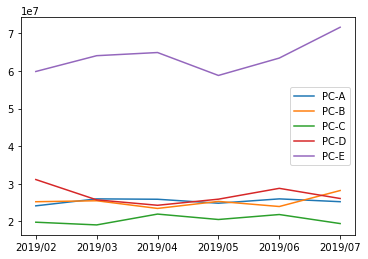

In [48]:
#商品別の売上げの時系列変化を折れ線グラフで表示
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index),graph_data["PC-A"],label="PC-A")
plt.plot(list(graph_data.index),graph_data["PC-B"],label="PC-B")
plt.plot(list(graph_data.index),graph_data["PC-C"],label="PC-C")
plt.plot(list(graph_data.index),graph_data["PC-D"],label="PC-D")
plt.plot(list(graph_data.index),graph_data["PC-E"],label="PC-E")
plt.legend();

### 一目でPC-Eが売上げを牽引している機種であることや売上げの傾向を掴むことができる
### このような可視化を行いながら、分析を進め、現場の人に説明をしていくことが重要

---

# 実践データ分析　ケース2
## 汚いデータの扱い
### ECサイトの売上げデータ
ある小売店の売上履歴と顧客台帳データを用いて、データ分析の素地となる「データの加工」を習得する。実際の現場データは手入力のExcel等、決して綺麗なデータではないことが多い。データの揺れや整合性の担保など、汚いデータを取り扱うデータ加工を主体に進める。
- ステップ1：データの読込
- ステップ2：データの揺れをみる
- ステップ3：商品名の揺れを補正する
- ステップ4：欠損値を補完する
- ステップ5：顧客名の揺れも補正する
- ステップ6：日付の揺れも補正する
- ステップ7：顧客名を主軸に2つのデータを結合（ジョイン）する
- ステップ8：クレンジングしたデータを俯瞰する
- ステップ9：データ集計する

#### ステップ1 データの読込
- 売上げデータ（sales.csv）
- 顧客情報（customer_info.xlsx）

### 売上げデータ(sales.csv）を読み込む

In [74]:
import pandas as pd
sales_data = pd.read_csv('sales.csv')
sales_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


### 顧客情報(customer_info.xlsx）を読み込む

In [73]:
customer_data = pd.read_excel('customer_info.xlsx')
customer_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


---

#### ステップ2 データの揺れをみる

### 各種データ内に存在するデータの揺れと欠損値の有無を確認する

In [63]:
pd.set_option("display.max_rows",None)

In [53]:
sales_data

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二
5,2019-03-20 19:16:01,商品S,1900.0,堀江佑
6,2019-05-18 19:16:53,商品 a,NaN,深井照生
7,2019-04-18 00:14:21,商品V,2200.0,牧田玲那
8,2019-01-10 15:51:01,商品O,1500.0,堀北雅彦
9,2019-01-28 10:47:03,商品A,100.0,大地礼子


In [54]:
customer_data

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127
5,梅沢 麻緒,うめざわ まお,A市,umezawa_mao@example.com,2017/06/20
6,相原 ひとり,あいはら ひとり,H市,aihara_hitori@example.com,2018/06/11
7,新村 丈史,にいむら たけし,B市,niimura_takeshi@example.com,2017/05/19
8,石川 まさみ,いしかわ まさみ,G市,ishikawa_masami@example.com,2018/02/12
9,小栗 正義,おぐり まさよし,G市,oguri_masayoshi@example.com,2017/07/05


In [55]:
sales_data["item_name"]

0          商品A
1        商 品 S
2        商 品 a
3          商品Z
4          商品a
5          商品S
6         商品 a
7          商品V
8          商品O
9          商品A
10        商 品U
11         商品L
12       商  品V
13        商 品O
14         商品A
15         商品C
16         商品V
17         商品I
18         商品r
19         商品X
20         商品O
21        商品 g
22         商品X
23         商品R
24         商品P
25         商品Q
26         商品y
27         商品P
28         商品P
29         商品R
30         商品P
31        商品 A
32         商品N
33         商品R
34         商品W
35         商品A
36        商 品E
37         商品K
38         商品O
39         商品W
40         商品O
41         商品K
42         商品B
43         商品F
44         商品P
45         商品X
46         商品B
47        商 品s
48         商品F
49         商品X
50         商品W
51       商 品 n
52         商品Q
53         商品P
54         商品I
55        商 品F
56         商品D
57         商品R
58         商品M
59         商品M
60         商品Q
61         商品A
62         商品Y
63         商品I
64         商品U
65         商品H
66        

In [56]:
sales_data["item_price"]

0        100.0
1          NaN
2          NaN
3       2600.0
4          NaN
5       1900.0
6          NaN
7       2200.0
8       1500.0
9        100.0
10      2100.0
11      1200.0
12      2200.0
13      1500.0
14         NaN
15       300.0
16      2200.0
17       900.0
18      1800.0
19      2400.0
20      1500.0
21       700.0
22      2400.0
23      1800.0
24      1600.0
25      1700.0
26      2500.0
27      1600.0
28         NaN
29      1800.0
30      1600.0
31       100.0
32         NaN
33      1800.0
34      2300.0
35       100.0
36       500.0
37      1100.0
38      1500.0
39         NaN
40      1500.0
41      1100.0
42       200.0
43       600.0
44      1600.0
45      2400.0
46       200.0
47      1900.0
48       600.0
49      2400.0
50      2300.0
51      1400.0
52      1700.0
53      1600.0
54       900.0
55       600.0
56       400.0
57         NaN
58      1300.0
59      1300.0
60      1700.0
61       100.0
62      2500.0
63         NaN
64      2100.0
65       800.0
66      16

In [57]:
customer_data["登録日"]

0      2018/01/04
1           42782
2      2018/01/07
3           42872
4           43127
5      2017/06/20
6      2018/06/11
7      2017/05/19
8      2018/02/12
9      2017/07/05
10     2018/03/31
11     2017/04/22
12     2018/03/09
13     2017/03/13
14     2018/01/24
15     2017/06/09
16     2018/05/02
17     2017/02/05
18     2018/07/10
19     2017/07/08
20     2018/03/12
21          42920
22     2018/02/28
23     2017/05/16
24     2018/01/29
25     2017/03/17
26     2018/06/28
27          42901
28     2018/05/21
29     2017/03/12
30     2018/07/01
31     2017/01/30
32     2018/02/06
33     2017/01/30
34     2018/04/21
35     2017/04/01
36     2018/04/07
37     2017/07/28
38     2018/05/09
39     2017/02/19
40     2018/01/08
41     2017/07/10
42     2018/02/06
43     2017/06/16
44     2018/05/22
45     2017/07/07
46     2018/02/02
47          42741
48     2018/02/22
49          42929
50     2018/01/11
51     2017/04/11
52     2018/07/22
53          42833
54     2018/05/13
55     201

### データに揺れがあるまま集計してみる
商品Sと商品s など、本来同じ商品が別の商品として集計されている。データの揺れがあるため、本来26個の商品が99個に増えてしまっている。

In [81]:
sales_data["purchase_date"]=pd.to_datetime(sales_data["purchase_date"])
sales_data["purchase_month"]=sales_data["purchase_date"].dt.strftime("%Y/%m")
res=sales_data.pivot_table(index="purchase_month",columns="item_name",aggfunc="size",fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
2019/01,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2019/02,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
2019/03,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019/04,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2019/05,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2019/06,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2019/07,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


#### データの揺れが残ったままの集計や分析は全く意味のない結果になってしまう。やはりデータ加工が分析の前処理として重要である。


---

#### ステップ3 商品名の揺れを補正する

In [65]:
#まずは現状の確認（これも重要）
#売上げ履歴のitem_nameの重複を除外したユニークなデータ件数を出力する
#商品Sや商品s などがあるので、データ件数は99個になってしまう
print( len( pd.unique(sales_data["item_name"]) ) )

99


In [66]:
#大文字にそろえる　小文字→大文字に変換
sales_data["item_name"]=sales_data["item_name"].str.upper()

#全角スペースを除去する
sales_data["item_name"]=sales_data["item_name"].str.replace("　","")

#半角スペースを除去する
sales_data["item_name"]=sales_data["item_name"].str.replace(" ","")

#item_nameを名前順にソートして見やすくする
sales_data.sort_values(by=["item_name"],ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_data
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,2019-06-13 18:02:34
1748,2019-05-19 20:22:22,商品A,100.0,松川綾女,2019-05-19 20:22:22
223,2019-06-25 08:13:20,商品A,100.0,板橋隆,2019-06-25 08:13:20
1742,2019-06-13 16:03:17,商品A,100.0,小平陽子,2019-06-13 16:03:17
1738,2019-02-10 00:28:43,商品A,100.0,松田浩正,2019-02-10 00:28:43
1721,2019-02-24 19:18:05,商品A,100.0,楠哲平,2019-02-24 19:18:05
1708,2019-03-27 17:10:06,商品A,100.0,西脇礼子,2019-03-27 17:10:06
1707,2019-03-25 21:42:02,商品A,100.0,浅見広司,2019-03-25 21:42:02
234,2019-03-23 09:32:03,商品A,100.0,赤木だん吉,2019-03-23 09:32:03
1684,2019-02-17 20:25:57,商品A,100.0,手塚雅之,2019-02-17 20:25:57


In [67]:
print(pd.unique(sales_data["item_name"]))
print( len( pd.unique(sales_data["item_name"]) ) )
#99→26に整理できる

['商品A' '商品S' '商品Z' '商品V' '商品O' '商品U' '商品L' '商品C' '商品I' '商品R' '商品X' '商品G'
 '商品P' '商品Q' '商品Y' '商品N' '商品W' '商品E' '商品K' '商品B' '商品F' '商品D' '商品M' '商品H'
 '商品T' '商品J']
26


---

#### ステップ4 欠損値を補完する

In [ ]:

#isnull()で欠損値の有無を確認できる

item_priceがTrueになっているので、この項目に欠損値が含まれていることを確認できる

欠損値を補完する<br>
今回のケースでは、欠損値は正しく記載された他の行から同じ商品の単価を調べ補完できる（集計期間中の商品単価の変動はないという前提条件）

In [ ]:
#欠損値のある箇所を特定する
#flg_is_null変数には、欠損値がある行はTrue、欠損値がない行はFalseになったデータが格納される


In [ ]:
#sales_data.loc[(flg_is_null == False) & (sales_data['item_name']=='商品S'),'item_price']

In [ ]:
#flg_is_nullに格納されている「item_name」の列データから取り出した99個のユニークな商品名を対象にfor文をまわす
#unigue（）は抽出した商品名の重複をなくすために用いられる


### データ検算

In [ ]:
                                                        #skipnaはNaNデータを無視するかどうかを設定できる。Falseにした場合、最小値はNaNになる

---

#### ステップ5 顧客名の揺れも補正する

**このままでは、売上げ履歴と顧客台帳を結合してもだたしく結合できない**

In [ ]:
#半角・全角スペースを除去する


**実際のデータの中には名前の誤変換などの複雑な揺れが存在することも多々ある。その場合はプログラムで補正することができないため、現場の運用スタッフにヒアリングし、地道に名寄せ作業を行う必要がある。**

---

#### ステップ6 日付の揺れも補正する

**登録日の列には「42782」のように日付でない数字がいくつか見られる。Excelデータに格納されたデータに書式が違うデータがコン愛することはよくある。**

In [ ]:
#日付を統一フォーマットに補正する前に状況把握
#str.isdigit()を用いて、顧客台帳の登録日が数値かどうかをチェックする　True・・・数値　False・・・数値ではない


In [ ]:
#登録日が数値データになっている件数を確認する


In [ ]:
#日付を統一フォーマットに補正する


In [ ]:
#もともと日付だったデータも、書式統一のために処理する


In [ ]:
#数値から日付に補正したデータと、書式を変更したデータを結合しcustomer_data['登録日']データを更新する


In [ ]:
#データ検算 数値項目が残っていないかチェックする


**数値データ件数は「0件」となり、すべての数値データが日付に補正されたことが確認できた**

In [ ]:
#登録日から登録付を算出し、集計する


---

#### ステップ7 顧客名を主軸に2つのデータを結合（ジョイン）する
売上げ履歴と顧客台帳を結合し、集計のベースとなるデータを作成する

**共通する列名がない。**

---

#### ステップ8 クレンジングしたデータを俯瞰する
きれいになったデータをファイル出力（ダンプ）して、分析をする際は出力ファイルから読込分析を行うことで、クレンジングのやり直しを省略する

In [ ]:
#ダンプする前に列を並び替え、より分かりやすくする。例えば、購入日付情報を隣り合わせにする


In [ ]:
#csvファイル「dump_data.csv」に出力する

---

#### ステップ9 データを集計する

In [ ]:
#さきほどダンプした「dump_data.csv」を読み込んでデータ集計の準備をする


In [ ]:
#purchase_monthを縦軸に、商品ごとの集計結果を表示する


In [ ]:
#purchase_monthを縦軸に、商品ごとの売上金額を集計する


In [ ]:
#purchase_monthを縦軸に、各顧客の購入数を集計する


In [ ]:
#purchase_monthを縦軸に、地域ごとの購入数を集計する


In [ ]:
#customer_dataと主としてsales_dataを結合し、集計期間で商品を購入していないユーザがいないかチェックする準備を行う


In [ ]:
#集計期間で商品を購入していないユーザがいないかチェックする


# END